In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Description
Notebook contains preparation of signal and background for two domains: Source (Monte-Carlo) and Target (Real). The events for $$Ds\rightarrow\phi\pi$$ channel will be taken for this (see [check_agreement.csv](https://www.kaggle.com/c/flavours-of-physics/data))
1. Simulated signal - "signal=1" from agreement test
2. Real signal - "signal=0 and weight >> 0" from agreement test
3. Real background - "signal=0 and weight << 0" from agreement test
4. Simulated background - "signal=1" from $\tau\rightarrow\mu\mu\mu$-channel (see [training.csv](https://www.kaggle.com/c/flavours-of-physics/data))

In [3]:
agreement = pd.read_csv('datasets/check_agreement.csv.zip')
print agreement.shape
agreement.head(1)

(331147, 49)


,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,signal,weight
0,15347063,0.001451,0.999964,6.94503,0.229196,0.058117,2.961298,7.953543,2251.611816,0.082219,...,834.562378,10392.814453,6380.673828,15195.594727,2.666142,3.302978,3.594246,512,0,-0.307813


In [4]:
training = pd.read_csv('datasets/training.csv.zip')
print training.shape
training.head(1)

(67553, 51)


,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.0038,4.031514,458,-99,0,1866.300049,0.277559


In [10]:
features = list(set(training.columns) & set(agreement.columns))
len(features)

48

# 1. Simulated signal - "signal=1" from agreement test

In [32]:
signal_mc = agreement.query('signal==1')[features]
signal_mc['domain'] = 0
print signal_mc.shape

(8205, 49)


# 2. Real signal - "signal=0 and weight >> 0" from agreement test

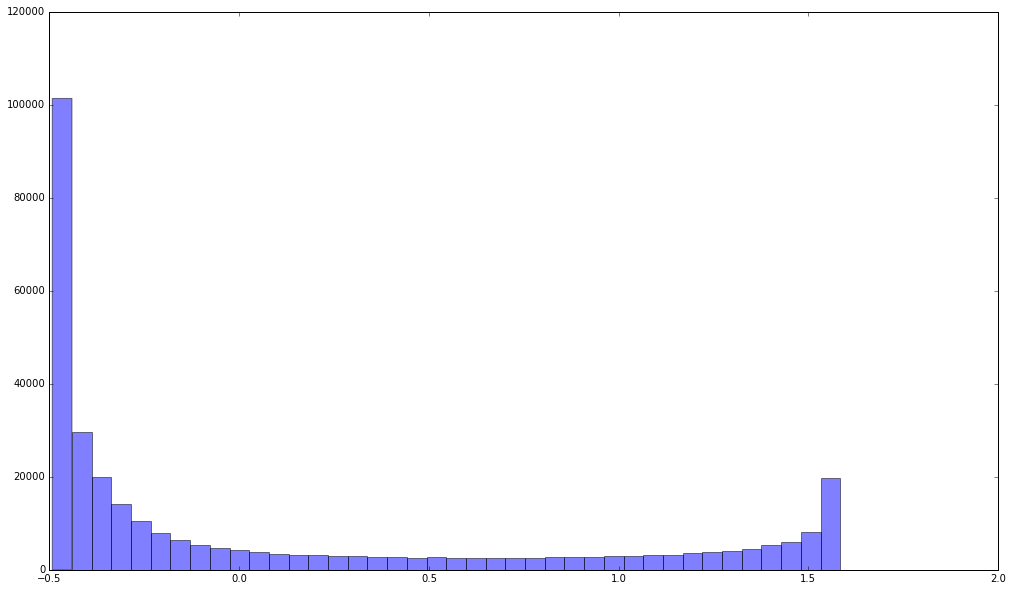

In [18]:
plt.figure(figsize=(17, 10))
plt.hist(agreement.query('signal==0').weight, bins=40, alpha=0.5)
pass

In [33]:
signal_real = agreement.query('signal == 0 and weight > 1.5')[features]
signal_real['signal'] = 1
signal_real['domain'] = 1
print signal_real.shape

(24970, 49)


# 3. Real background - "signal=0 and weight << 0" from agreement test

In [34]:
bckg_real = agreement.query('signal == 0 and weight < -0.4')[features]
bckg_real['domain'] = 1
print bckg_real.shape

(125589, 49)


# 4. Simulated background - "signal=1" from  τ→μμμ

In [35]:
bckg_mc = training.query('signal == 1')[features]
bckg_mc['signal'] = 0
bckg_mc['domain'] = 0
print bckg_mc.shape

(41674, 49)


# 5. Final sample

In [30]:
sample_final = pd.concat([signal_real, signal_mc, bckg_real, bckg_mc])
print sample_final.shape
sample_final.to_csv('datasets/domains.csv', index=None)
sample_final.head()

(200438, 49)


,FlightDistanceError,IP,SPDhits,p2_IPSig,p0_IP,DOCAone,p0_IPSig,DOCAtwo,p0_eta,p0_track_Chi2Dof,...,VertexChi2,signal,p2_track_Chi2Dof,p1_IsoBDT,p2_eta,p1_eta,p2_IP,iso,p1_IPSig,domain
15,0.678827,0.032425,76,9.226010,0.144528,0.044007,3.272880,0.047168,4.251790,0.931451,...,2.557416,1,0.572096,-0.218972,3.854100,3.452307,0.484351,0.0,16.814024,1
17,0.163634,0.045263,519,4.762966,0.089052,0.065127,3.071803,0.066712,2.455564,0.960383,...,14.301222,1,1.126602,-0.155172,3.199158,2.841748,0.151156,4.0,4.997229,1
43,0.185843,0.047824,392,16.074310,1.352370,0.030915,40.599300,0.004455,2.844135,0.954743,...,1.462178,1,1.021096,-0.425281,2.350151,2.604352,0.265362,0.0,25.920881,1
89,0.166625,0.038969,368,22.297640,0.539484,0.032754,35.473797,0.030980,2.361320,0.554871,...,4.318286,1,1.112612,-0.348910,3.218408,2.573816,0.560078,1.0,19.023470,1
100,0.261182,0.121370,666,22.619322,0.656749,0.004025,31.651461,0.028839,2.821793,1.149917,...,6.537395,1,1.901846,-0.115879,2.899785,2.969197,0.963611,3.0,15.196798,1
